In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
studentDropout_dataset = pd.read_csv('/content/drive/MyDrive/FDM Project/SchoolDropout.csv')

In [ ]:
studentDropout_dataset.head()

,school,sex,age,address,Family Size,Parents' Cohabitation Status,Mother's education,Father's education,Mother's job,Father's job,...,access to internet,In romantic relationship or not,famrel,freetime after school,Going Out,Workday Alchohol Consumption,Weekend Alchohol Consumption,health,absences,dropout
0,Gabriel Pereira,Female,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,teacher,...,no,no,Good,moderate,regularly,Very Low,very low,average,6,yes
1,Gabriel Pereira,Female,17,Urban,Greater than 3,Living Together,4th grade,4th grade,at_home,other,...,yes,no,Excellent,moderate,occasionally,Very Low,very low,average,4,yes
2,Gabriel Pereira,Female,15,Urban,Less or equal to 3,Living Together,4th grade,4th grade,at_home,other,...,yes,no,Good,moderate,rarely,Low,average,average,10,no
3,Gabriel Pereira,Female,15,Urban,Greater than 3,Living Together,higher education,9th grade,health,services,...,yes,yes,Average,limited,rarely,Very Low,very low,very good,2,no
4,Gabriel Pereira,Female,16,Urban,Greater than 3,Living Together,12th grade,12th grade,other,other,...,no,no,Good,moderate,rarely,Very Low,low,very good,4,no


In [ ]:
studentDropout_dataset.shape

(395, 31)

In [ ]:
categorical_columns = studentDropout_dataset.select_dtypes(include=['object']).columns.tolist()
numerical_columns = studentDropout_dataset.select_dtypes(exclude=['object']).columns.tolist()

# Count the number of categorical and numerical columns
num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

print("\nNumber of Categorical Columns:", num_categorical_columns)
print("Number of Numerical Columns:", num_numerical_columns)


Number of Categorical Columns: 28
Number of Numerical Columns: 3


In [ ]:
#drop unnecessary columns
columns_to_drop = ['school', 'address', 'guardian', 'famsup', 'nursery', 'famrel', 'absences']
studentDropout_dataset = studentDropout_dataset.drop(columns=columns_to_drop)

In [ ]:
#rename columns
new_column_names = {
    'Family Size': 'famsize',
    "Parents' Cohabitation Status": 'p_cstatus',
    "Mother's education": 'medu',
    "Father's education" : 'fedu',
    "Mother's job" : 'mjob',
    "Father's job" : 'fjob',
    'reason to choose school' : 'reason',
    'traveltime (home to school)' : 'tTime',
    'weekly study time ' : 'w_sTime',
    'past class failures' : 'pc_failures',
    'takes extra paid classes' : 'paid',
    'extra-curricular activities' : 'activities',
    'willingness to pursue higher education' : 'passion',
    'access to internet' : 'internet',
    'In romantic relationship or not' : 'relationship',
    'freetime after school' : 'ftime',
    'Going Out' : 'goingOut',
    'Workday Alchohol Consumption' : 'Dalc',
    'Weekend Alchohol Consumption' : 'Walc'
}

studentDropout_dataset.rename(columns=new_column_names, inplace=True)

In [ ]:
studentDropout_dataset.head()

,sex,age,famsize,p_cstatus,medu,fedu,mjob,fjob,reason,tTime,...,activities,passion,internet,relationship,ftime,goingOut,Dalc,Walc,health,dropout
0,Female,18,Greater than 3,Apart,higher education,higher education,at_home,teacher,course,15 to 30 min,...,no,yes,no,no,moderate,regularly,Very Low,very low,average,yes
1,Female,17,Greater than 3,Living Together,4th grade,4th grade,at_home,other,course,<15 min,...,no,yes,yes,no,moderate,occasionally,Very Low,very low,average,yes
2,Female,15,Less or equal to 3,Living Together,4th grade,4th grade,at_home,other,other,<15 min,...,no,yes,yes,no,moderate,rarely,Low,average,average,no
3,Female,15,Greater than 3,Living Together,higher education,9th grade,health,services,home,<15 min,...,yes,yes,yes,yes,limited,rarely,Very Low,very low,very good,no
4,Female,16,Greater than 3,Living Together,12th grade,12th grade,other,other,home,<15 min,...,no,yes,no,no,moderate,rarely,Very Low,low,very good,no


In [ ]:
studentDropout_dataset.describe()

,age,pc_failures
count,395.000000,395.000000
mean,16.696203,0.334177
std,1.276043,0.743651
min,15.000000,0.000000
25%,16.000000,0.000000
50%,17.000000,0.000000
75%,18.000000,0.000000
max,22.000000,3.000000


In [ ]:
#data types of columns
print(studentDropout_dataset.dtypes)

sex             object
age              int64
famsize         object
p_cstatus       object
medu            object
fedu            object
mjob            object
fjob            object
reason          object
tTime           object
w_sTime         object
pc_failures      int64
schoolsup       object
paid            object
activities      object
passion         object
internet        object
relationship    object
ftime           object
goingOut        object
Dalc            object
Walc            object
health          object
dropout         object
dtype: object


In [ ]:
# Perform one-hot encoding on the "sex" column
studentDropout_dataset = pd.get_dummies(studentDropout_dataset, columns=['sex'], prefix=['Gender'])

In [ ]:
# Perform one-hot encoding on the "famsize" column
studentDropout_dataset = pd.get_dummies(studentDropout_dataset, columns=['famsize'], prefix=['famsize'])


In [ ]:
# Perform one-hot encoding on the "p_cstatus" column
studentDropout_dataset = pd.get_dummies(studentDropout_dataset, columns=['p_cstatus'], prefix=['p_cstatus'])

In [ ]:
studentDropout_dataset.head()

,age,medu,fedu,mjob,fjob,reason,tTime,w_sTime,pc_failures,schoolsup,...,Dalc,Walc,health,dropout,Gender_Female,Gender_Male,famsize_Greater than 3,famsize_Less or equal to 3,p_cstatus_Apart,p_cstatus_Living Together
0,18,higher education,higher education,at_home,teacher,course,15 to 30 min,2 to 5 hours,0,yes,...,Very Low,very low,average,yes,1,0,1,0,1,0
1,17,4th grade,4th grade,at_home,other,course,<15 min,2 to 5 hours,0,no,...,Very Low,very low,average,yes,1,0,1,0,0,1
2,15,4th grade,4th grade,at_home,other,other,<15 min,2 to 5 hours,3,yes,...,Low,average,average,no,1,0,0,1,0,1
3,15,higher education,9th grade,health,services,home,<15 min,5 to 10 hours,0,no,...,Very Low,very low,very good,no,1,0,1,0,0,1
4,16,12th grade,12th grade,other,other,home,<15 min,2 to 5 hours,0,no,...,Very Low,low,very good,no,1,0,1,0,0,1


In [ ]:
# Sample DataFrame with "Mother's Education" column
data = {'medu': ["none","4th grade", "9th grade", "12th grade", "higher education"]}
df = pd.DataFrame(data)

# Define a mapping for the education levels
education_mapping = {
    "none" : 0,
    "4th grade": 1,
    "9th grade": 2,
    "12th grade": 3,
    "higher education": 4
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['medu'] = studentDropout_dataset['medu'].map(education_mapping).astype(int)


In [ ]:
# Sample DataFrame with "father's Education" column
data = {'fedu': ["none","4th grade", "9th grade", "12th grade", "higher education"]}
df = pd.DataFrame(data)

# Define a mapping for the education levels
education_mapping = {
    "none" : 0,
    "4th grade": 1,
    "9th grade": 2,
    "12th grade": 3,
    "higher education": 4
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['fedu'] = studentDropout_dataset['fedu'].map(education_mapping).astype(int)


In [ ]:
# Sample DataFrame with travel time column
data = {'tTime': ["15 to 30 min","<15 min", "30 min to 1 hour", ">1 hour"]}
df = pd.DataFrame(data)

# Define a mapping for the travel time
tTime_mapping = {
    "<15 min" : 0,
    "15 to 30 min": 1,
    "30 min to 1 hour": 2,
    ">1 hour": 3
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['tTime'] = studentDropout_dataset['tTime'].map(tTime_mapping).astype(int)

In [ ]:
# Sample DataFrame with weekly study time Education" column
data = {'w_sTime': ["<2 hours","2 to 5 hours", "5 to 10 hours", ">10 hours"]}
df = pd.DataFrame(data)

# Define a mapping for the weekly study time
w_sTime_mapping = {
    "<2 hours" : 0,
    "2 to 5 hours": 1,
    "5 to 10 hours": 2,
    ">10 hours": 3
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['w_sTime'] = studentDropout_dataset['w_sTime'].map(w_sTime_mapping).astype(int)

In [ ]:
# Sample DataFrame with workday alchohol consumption column
data = {'Dalc': ["Very Low","Low", "Average", "High", "Very High"]}
df = pd.DataFrame(data)

# Define a mapping for the workday alchohol consumption
Dalc_mapping = {
    "Very Low" : 0,
    "Low": 1,
    "Average": 2,
    "High": 3,
    "Very High" : 4
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['Dalc'] = studentDropout_dataset['Dalc'].map(Dalc_mapping).astype(int)

In [ ]:
# Sample DataFrame with weekend alchohol consumption column
data = {'Walc': ["very low","low", "average", "high", "very high"]}
df = pd.DataFrame(data)

# Define a mapping for the weekend alchohol consumption
Walc_mapping = {
    "very low" : 0,
    "low": 1,
    "average": 2,
    "high": 3,
    "very high" : 4
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['Walc'] = studentDropout_dataset['Walc'].map(Walc_mapping).astype(int)

In [ ]:
# Sample DataFrame with health column
data = {'health': ["very bad","bad", "average", "good", "very good"]}
df = pd.DataFrame(data)

# Define a mapping for the health levels
health_mapping = {
    "very bad" : 0,
    "bad": 1,
    "average": 2,
    "good": 3,
    "very good" : 4
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['health'] = studentDropout_dataset['health'].map(health_mapping).astype(int)

In [ ]:
print(studentDropout_dataset.dtypes)

age                            int64
medu                           int64
fedu                           int64
mjob                          object
fjob                          object
reason                        object
tTime                          int64
w_sTime                        int64
pc_failures                    int64
schoolsup                     object
paid                          object
activities                    object
passion                       object
internet                      object
relationship                  object
ftime                         object
goingOut                      object
Dalc                           int64
Walc                           int64
health                         int64
dropout                       object
Gender_Female                  uint8
Gender_Male                    uint8
famsize_Greater than 3         uint8
famsize_Less or equal to 3     uint8
p_cstatus_Apart                uint8
p_cstatus_Living Together      uint8
d

In [ ]:
studentDropout_dataset.head()

,age,medu,fedu,mjob,fjob,reason,tTime,w_sTime,pc_failures,schoolsup,...,Dalc,Walc,health,dropout,Gender_Female,Gender_Male,famsize_Greater than 3,famsize_Less or equal to 3,p_cstatus_Apart,p_cstatus_Living Together
0,18,4,4,at_home,teacher,course,1,1,0,yes,...,0,0,2,yes,1,0,1,0,1,0
1,17,1,1,at_home,other,course,0,1,0,no,...,0,0,2,yes,1,0,1,0,0,1
2,15,1,1,at_home,other,other,0,1,3,yes,...,1,2,2,no,1,0,0,1,0,1
3,15,4,2,health,services,home,0,2,0,no,...,0,0,4,no,1,0,1,0,0,1
4,16,3,3,other,other,home,0,1,0,no,...,0,1,4,no,1,0,1,0,0,1


In [ ]:
 #Sample DataFrame with schoolsup column
data = {'schoolsup': ["yes","no"]}
df = pd.DataFrame(data)

# Define a mapping for the school support
schoolsup_mapping = {
    "yes" : 1,
    "no": 0
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['schoolsup'] = studentDropout_dataset['schoolsup'].map(schoolsup_mapping).astype(int)

In [ ]:
 #Sample DataFrame with activities column
data = {'activities': ["yes","no"]}
df = pd.DataFrame(data)

# Define a mapping for the activities
activities_mapping = {
    "yes" : 1,
    "no": 0
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['activities'] = studentDropout_dataset['activities'].map(activities_mapping).astype(int)

In [ ]:
 #Sample DataFrame with passion column
data = {'passion': ["yes","no"]}
df = pd.DataFrame(data)

# Define a mapping for the passion
passion_mapping = {
    "yes" : 1,
    "no": 0
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['passion'] = studentDropout_dataset['passion'].map(passion_mapping).astype(int)

In [ ]:
 #Sample DataFrame with paid column
data = {'paid': ["yes","no"]}
df = pd.DataFrame(data)

# Define a mapping for the payment
paid_mapping = {
    "yes" : 1,
    "no": 0
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['paid'] = studentDropout_dataset['paid'].map(paid_mapping).astype(int)

In [ ]:
#Sample DataFrame with mjob column
data = {'mjob': ["at_home","teacher","services","health","other"]}
df = pd.DataFrame(data)

# Define a mapping for the mother's job
mjob_mapping = {
    "at_home" : 0,
    "teacher": 1,
    "services" : 2,
    "health" : 3,
    "other" : 4
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['mjob'] = studentDropout_dataset['mjob'].map(mjob_mapping).astype(int)

In [ ]:
#Sample DataFrame with fjob" column
data = {'fjob': ["at_home","teacher","services","health","other"]}
df = pd.DataFrame(data)

# Define a mapping for the father's job
fjob_mapping = {
    "at_home" : 0,
    "teacher": 1,
    "services" : 2,
    "health" : 3,
    "other" : 4
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['fjob'] = studentDropout_dataset['fjob'].map(fjob_mapping).astype(int)

In [ ]:
#Sample DataFrame with reason" column
data = {'reason': ["course","other","home","reputation"]}
df = pd.DataFrame(data)

# Define a mapping for the reason
reason_mapping = {
    "course" : 0,
    "other": 1,
    "home" : 2,
    "reputation" : 3
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['reason'] = studentDropout_dataset['reason'].map(reason_mapping).astype(int)

In [ ]:
 #Sample DataFrame with relationship column
data = {'relationship': ["yes","no"]}
df = pd.DataFrame(data)

# Define a mapping for the relationship
relationship_mapping = {
    "yes" : 1,
    "no": 0
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['relationship'] = studentDropout_dataset['relationship'].map(relationship_mapping).astype(int)

In [ ]:
#Sample DataFrame with ftime column
data = {'ftime': ["scarce","limited","moderate","plenty", "ample"]}
df = pd.DataFrame(data)

# Define a mapping for the free time
ftime_mapping = {
    "scarce" : 0,
    "limited": 1,
    "moderate" : 2,
    "plenty" : 3,
    "ample" : 4
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['ftime'] = studentDropout_dataset['ftime'].map(ftime_mapping).astype(int)

In [ ]:
#Sample DataFrame with goingOut column
data = {'goingOut': ["very rarely","rarely","occasionally","regularly", "daily"]}
df = pd.DataFrame(data)

# Define a mapping for going out
goingOut_mapping = {
    "very rarely" : 0,
    "rarely": 1,
    "occasionally" : 2,
    "regularly" : 3,
    "daily" : 4
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['goingOut'] = studentDropout_dataset['goingOut'].map(goingOut_mapping).astype(int)

In [ ]:
 #Sample DataFrame with internet column
data = {'internet': ["yes","no"]}
df = pd.DataFrame(data)

# Define a mapping for the internet
internet_mapping = {
    "yes" : 1,
    "no": 0
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['internet'] = studentDropout_dataset['internet'].map(internet_mapping).astype(int)

In [ ]:
studentDropout_dataset

,age,medu,fedu,mjob,fjob,reason,tTime,w_sTime,pc_failures,schoolsup,...,Dalc,Walc,health,dropout,Gender_Female,Gender_Male,famsize_Greater than 3,famsize_Less or equal to 3,p_cstatus_Apart,p_cstatus_Living Together
0,18,4,4,0,1,0,1,1,0,1,...,0,0,2,yes,1,0,1,0,1,0
1,17,1,1,0,4,0,0,1,0,0,...,0,0,2,yes,1,0,1,0,0,1
2,15,1,1,0,4,1,0,1,3,1,...,1,2,2,no,1,0,0,1,0,1
3,15,4,2,3,2,2,0,2,0,0,...,0,0,4,no,1,0,1,0,0,1
4,16,3,3,4,4,2,0,1,0,0,...,0,1,4,no,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,2,2,0,0,1,2,0,...,3,4,3,yes,0,1,0,1,1,0
391,17,3,1,2,2,0,1,0,0,0,...,2,3,1,no,0,1,0,1,0,1
392,21,1,1,4,4,0,0,0,3,0,...,2,2,2,yes,0,1,1,0,0,1
393,18,3,2,2,4,0,2,0,0,0,...,2,3,4,no,0,1,0,1,0,1


In [ ]:
#Sample DataFrame with dropout column
data = {'dropout': ["yes","no"]}
df = pd.DataFrame(data)

# Define a mapping for the dropout
dropout_mapping = {
    "no" : 0,
    "yes": 1
}

# Use the map function to replace the values in the DataFrame
studentDropout_dataset['dropout'] = studentDropout_dataset['dropout'].map(dropout_mapping).astype(int)

In [ ]:
# Step 1: Remove the "dropout" column and store it in a new variable
removed_column = studentDropout_dataset.pop('dropout')

# Step 2: Assign the removed column to a new column name in the DataFrame
studentDropout_dataset['dropout'] = removed_column

In [ ]:
studentDropout_dataset

,age,medu,fedu,mjob,fjob,reason,tTime,w_sTime,pc_failures,schoolsup,...,Dalc,Walc,health,Gender_Female,Gender_Male,famsize_Greater than 3,famsize_Less or equal to 3,p_cstatus_Apart,p_cstatus_Living Together,dropout
0,18,4,4,0,1,0,1,1,0,1,...,0,0,2,1,0,1,0,1,0,1
1,17,1,1,0,4,0,0,1,0,0,...,0,0,2,1,0,1,0,0,1,1
2,15,1,1,0,4,1,0,1,3,1,...,1,2,2,1,0,0,1,0,1,0
3,15,4,2,3,2,2,0,2,0,0,...,0,0,4,1,0,1,0,0,1,0
4,16,3,3,4,4,2,0,1,0,0,...,0,1,4,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,2,2,0,0,1,2,0,...,3,4,3,0,1,0,1,1,0,1
391,17,3,1,2,2,0,1,0,0,0,...,2,3,1,0,1,0,1,0,1,0
392,21,1,1,4,4,0,0,0,3,0,...,2,2,2,0,1,1,0,0,1,1
393,18,3,2,2,4,0,2,0,0,0,...,2,3,4,0,1,0,1,0,1,0


In [ ]:
#obtain minimum and maximum age values
min_value = studentDropout_dataset['age'].min()
max_value = studentDropout_dataset['age'].max()
print(f"The range of values in 'age' is: {min_value} - {max_value}")

The range of values in 'age' is: 15 - 22


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split your data into features (X) and the target variable (y)
X = studentDropout_dataset.drop('dropout', axis=1)
y = studentDropout_dataset['dropout']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Feature selection using RFE (Recursive Feature Elimination)
# Create a base model (e.g., a RandomForestClassifier)
base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE model and select the top 'k' features (you can adjust 'k')
rfe = RFE(base_model, n_features_to_select=10)  # Select the top 10 features
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Method 2: Feature selection using feature importance from a tree-based model
# Train a RandomForestClassifier (or other tree-based model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Sort features by importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
selected_features_importance = feature_importance_df.sort_values(by='Importance', ascending=False)['Feature']

# Print or visualize the selected features
print("Selected features using RFE:", selected_features)
print("Selected features using feature importance:", selected_features_importance)


Selected features using RFE: Index(['age', 'medu', 'mjob', 'reason', 'w_sTime', 'pc_failures', 'ftime',
       'goingOut', 'Walc', 'health'],
      dtype='object')
Selected features using feature importance: 8                    pc_failures
0                            age
16                      goingOut
3                           mjob
19                        health
15                         ftime
1                           medu
18                          Walc
2                           fedu
5                         reason
7                        w_sTime
4                           fjob
6                          tTime
17                          Dalc
10                          paid
14                  relationship
11                    activities
9                      schoolsup
12                       passion
22        famsize_Greater than 3
21                   Gender_Male
23    famsize_Less or equal to 3
20                 Gender_Female
13                      internet


In [ ]:
studentDropout_dataset = studentDropout_dataset[selected_features]
studentDropout_dataset

,age,medu,mjob,reason,w_sTime,pc_failures,ftime,goingOut,Walc,health
0,18,4,0,0,1,0,2,3,0,2
1,17,1,0,0,1,0,2,2,0,2
2,15,1,0,1,1,3,2,1,2,2
3,15,4,3,2,2,0,1,1,0,4
4,16,3,4,2,1,0,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,0,1,2,4,3,4,3
391,17,3,2,0,0,0,3,4,3,1
392,21,1,4,0,0,3,4,2,2,2
393,18,3,2,0,0,0,3,0,3,4


In [ ]:
#concatenate selected features and the label column
studentDropout_dataset = pd.concat([studentDropout_dataset, y], axis=1)
studentDropout_dataset

,age,medu,mjob,reason,w_sTime,pc_failures,ftime,goingOut,Walc,health,dropout
0,18,4,0,0,1,0,2,3,0,2,1
1,17,1,0,0,1,0,2,2,0,2,1
2,15,1,0,1,1,3,2,1,2,2,0
3,15,4,3,2,2,0,1,1,0,4,0
4,16,3,4,2,1,0,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,0,1,2,4,3,4,3,1
391,17,3,2,0,0,0,3,4,3,1,0
392,21,1,4,0,0,3,4,2,2,2,1
393,18,3,2,0,0,0,3,0,3,4,0


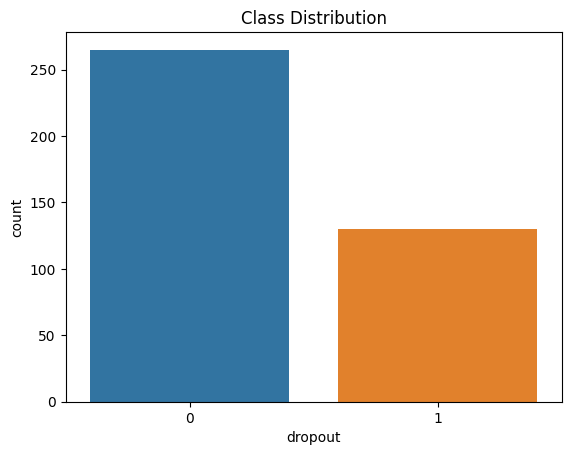

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with a 'dropout' column
sns.countplot(data=studentDropout_dataset, x='dropout')
plt.title('Class Distribution')
plt.show()


In [ ]:
import pandas as pd

# Calculate class counts
class_counts = studentDropout_dataset['dropout'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print("Imbalance Ratio:", imbalance_ratio)



Imbalance Ratio: 2.0384615384615383


In [ ]:
import numpy as np

# Assuming you have class_counts as calculated earlier
total_instances = sum(class_counts)

# Calculate the proportions of each class
class_proportions = class_counts / total_instances

# Calculate the Gini index
gini_index = 1 - np.sum(class_proportions**2)
print("Gini Index:", gini_index)


Gini Index: 0.4415958980932543


In [ ]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE

# Split your data into features (X) and the target variable (y)
X = studentDropout_dataset.drop('dropout', axis=1)
y = studentDropout_dataset['dropout']

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
print("Shape of the resampled dataset:", X_resampled.shape, y_resampled.shape)

Shape of the resampled dataset: (530, 10) (530,)


In [ ]:
import pandas as pd

# Create a DataFrame for X_resampled
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Create a Series for y_resampled
y_resampled_series = pd.Series(y_resampled, name='dropout')

# Concatenate the DataFrame and the Series along the columns (axis=1)
studentDropout_dataset_resampled = pd.concat([X_resampled_df, y_resampled_series], axis=1)

# Your combined dataset is now stored in combined_resampled_dataset


In [ ]:
studentDropout_dataset_resampled

,age,medu,mjob,reason,w_sTime,pc_failures,ftime,goingOut,Walc,health,dropout
0,18,4,0,0,1,0,2,3,0,2,1
1,17,1,0,0,1,0,2,2,0,2,1
2,15,1,0,1,1,3,2,1,2,2,0
3,15,4,3,2,2,0,1,1,0,4,0
4,16,3,4,2,1,0,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
525,21,2,2,0,0,3,3,3,3,0,1
526,15,2,0,0,1,0,2,3,0,0,1
527,15,1,0,0,0,0,2,2,0,2,1
528,18,2,0,0,2,0,2,2,0,2,1


In [ ]:
X = studentDropout_dataset_resampled.drop('dropout', axis=1)  # Replace 'target_column' with the name of your target column
y = studentDropout_dataset_resampled['dropout']

In [ ]:
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import the necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
}

# Create an SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVM model with the best hyperparameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters:", accuracy)


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, make_scorer


In [ ]:
svm = SVC(kernel='rbf')


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],      # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient for 'rbf'
}


In [ ]:
scorer = make_scorer(f1_score)

In [ ]:
grid_search = GridSearchCV(svm, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator (model)
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_svm.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("F1 Score on the test set:", f1)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(svm, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Evaluate the model on the test set
y_pred = best_svm.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("F1 Score on the test set:", f1)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Define your SVM model with the chosen kernel and initial hyperparameters
svm = SVC(kernel='rbf', C=1, gamma=0.01)  # Adjust C and gamma based on your tuning

# Perform cross-validation with k-fold (e.g., k=5) cross-validation
# You can use the scoring metric you're interested in (e.g., F1 score)
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='f1')

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())
